# Week 4

### Remove any data that is not relevant to the patient’s ALS condition.

In [43]:
# Load the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [44]:
# load and preview the data

als_df = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/week4/als_data.csv")

als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [45]:
als_df = als_df.drop(['ID', 'SubjectID'], axis = 1)

als_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


### Apply a standard scalar to the data.

In [46]:
# initiate standardizer
standardizer = StandardScaler()

In [47]:
#standardize data
als_df_std = standardizer.fit_transform(als_df)

### Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [48]:
clusters = []
k_clusters = []

for k in (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(als_df_std)
    
    # Add model to list
    clusters.append(model)
    k_clusters.append(model.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [49]:
als_df_silho = pd.DataFrame(columns=['Clusters', 'Sil. Score']) 

In [53]:
for c in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18):
    s = silhouette_score(als_df_std, clusters[c].predict(als_df_std), metric='euclidean')
    cluster = clusters[c].n_clusters
    als_df_silho = als_df_silho._append({'Clusters' : cluster, 'Silhouette Score' : s}, ignore_index=True)
    #als_df_silho = pd.concat([als_df_silho, als_df_silho.DataFrame([cluster])], ignore_index=True)

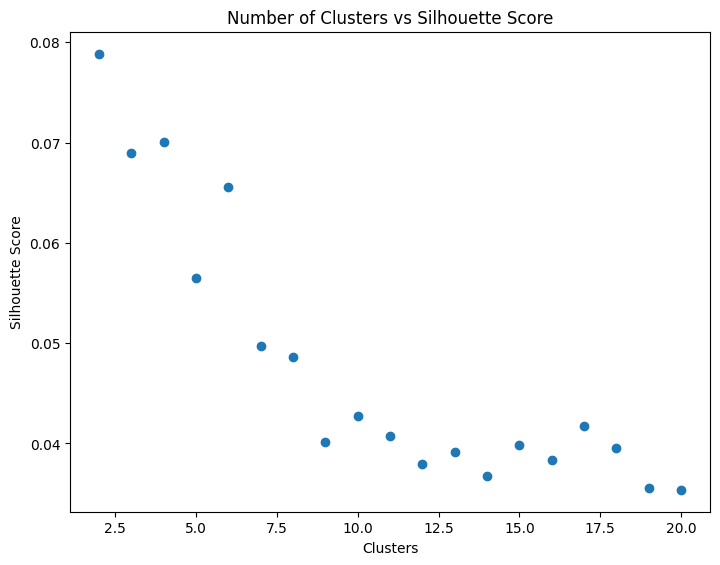

In [55]:
viz = plt.figure()
ax = viz.add_axes([0, 0, 1, 1])
ax.scatter(als_df_silho['Clusters'], als_df_silho['Silhouette Score'])
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Number of Clusters vs Silhouette Score')
plt.show()

### Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

2 clusters seems to have the highest silhouette score.

### Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [56]:
k_model_2 = KMeans(n_clusters = 2, random_state = 5)
k_model_2.fit(als_df_std)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=5)

In [57]:
cluster_labels = k_model_2.fit_predict(als_df_std)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Fit a PCA transformation with two features to the scaled data.

In [59]:
pca = PCA(n_components = 2)

als_pca = pca.fit_transform(als_df_std)

In [61]:
als_df_pca = pd.DataFrame(data = als_pca, columns = ['PC1', 'PC2'])

In [63]:
als_df_pca['Cluster'] = cluster_labels

### Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [66]:
als_cluster_0 = als_df_pca.loc[als_df_pca['Cluster'] == 0]
als_cluster_1 = als_df_pca.loc[als_df_pca['Cluster'] == 1]

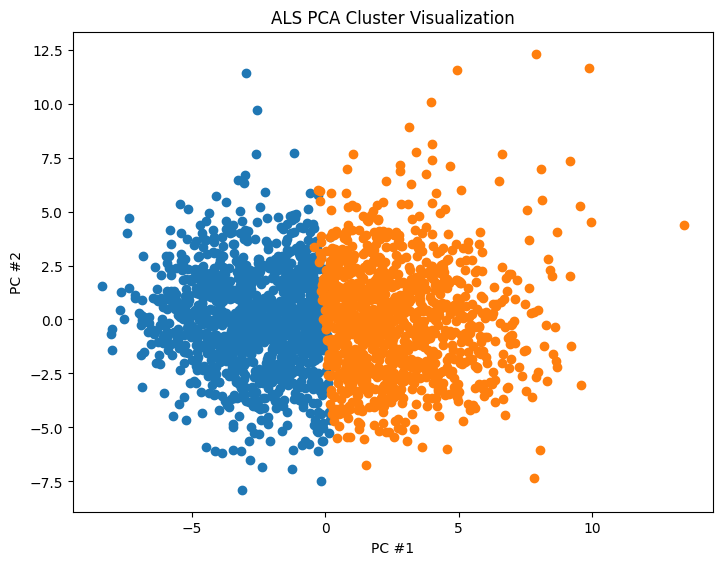

In [67]:
viz_2 = plt.figure()
ax = viz_2.add_axes([0, 0, 1, 1])
ax.scatter(als_cluster_0['PC1'] , als_cluster_0['PC2'])
ax.scatter(als_cluster_1['PC1'] , als_cluster_1['PC2'])
ax.set_xlabel('PC #1')
ax.set_ylabel('PC #2')
ax.set_title('ALS PCA Cluster Visualization')
plt.show()

### Summarize your results and make a conclusion.

Two groups have appeared among the data with some possible outliers in both groups.